In [61]:
#Importing Libraries
import os
import numpy as np
import tensorflow as tf
from PIL import Image
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, RandomFlip, RandomRotation, RandomZoom

In [29]:
#Fetch Images count from Fodlers
count = 0
dirs = os.listdir('Images/')
for dir in dirs:
    files = list(os.listdir('Images/' + dir))
    print(dir + ' Folder has ' + str(len(files)) + ' Images')
    count = count + len(files)
print(' Images Folder has ' + str(count) + ' Images')

daisy Folder has 764 Images
dandelion Folder has 1053 Images
rose Folder has 784 Images
sunflower Folder has 733 Images
tulip Folder has 984 Images
 Images Folder has 4318 Images


In [30]:
#Load Images into Arrays as Dataset
base_dir ='Images/'
img_size =180
batch = 32

In [31]:
 train_ds = tf.keras.utils.image_dataset_from_directory( base_dir,
                                                           seed = 123,
                                                           validation_split=0.2,
                                                           subset = 'training',
                                                           batch_size=batch,
                                                           image_size=(img_size,img_size))
val_ds = tf.keras.utils.image_dataset_from_directory( base_dir,
                                                            seed = 123,
                                                           validation_split=0.2,
                                                           subset = 'validation',
                                                           batch_size=batch,
                                                           image_size=(img_size,img_size))

Found 4318 files belonging to 5 classes.
Using 3455 files for training.
Found 4318 files belonging to 5 classes.
Using 863 files for validation.


In [32]:
flower_names = train_ds.class_names
flower_names

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

In [33]:
import matplotlib.pyplot as plt

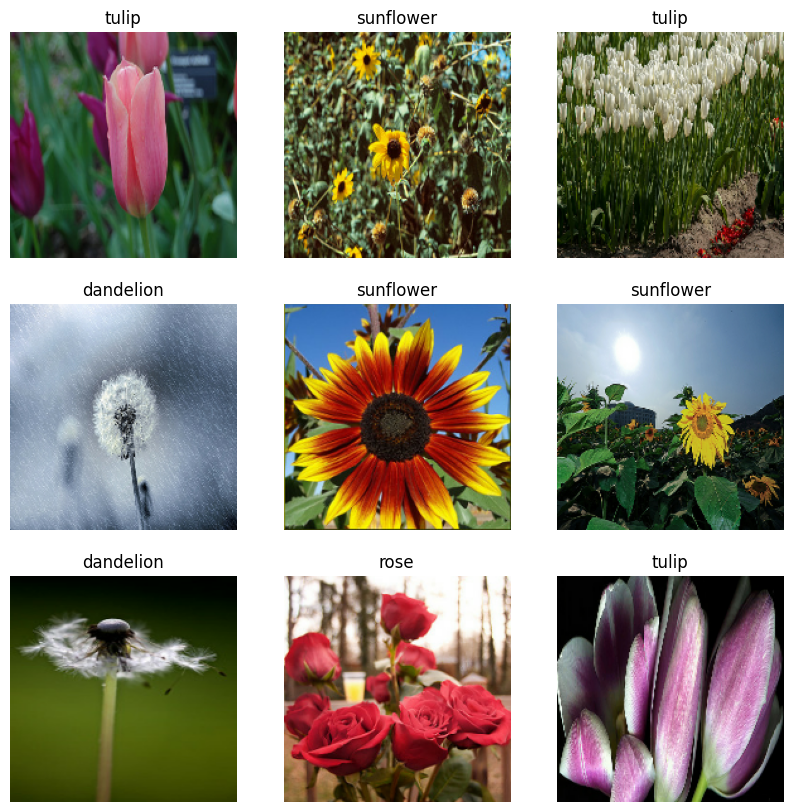

In [34]:
i=0
plt.figure(figsize=(10,10))

for images, labels in train_ds.take(1):
    for i in range(9):
        plt.subplot(3,3, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(flower_names[labels[i]])
        plt.axis('off')

In [35]:
AUTOTUNE = tf.data.AUTOTUNE

In [36]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = AUTOTUNE)

In [37]:
val_ds = val_ds.cache().prefetch(buffer_size = AUTOTUNE)

In [38]:
input_shape = (img_size, img_size, 3)

In [39]:
# Create the data augmentation pipeline
data_augmentation = Sequential([
    Input(shape=input_shape),
    RandomFlip("horizontal"),
    RandomRotation(0.1),
    RandomZoom(0.1),
])

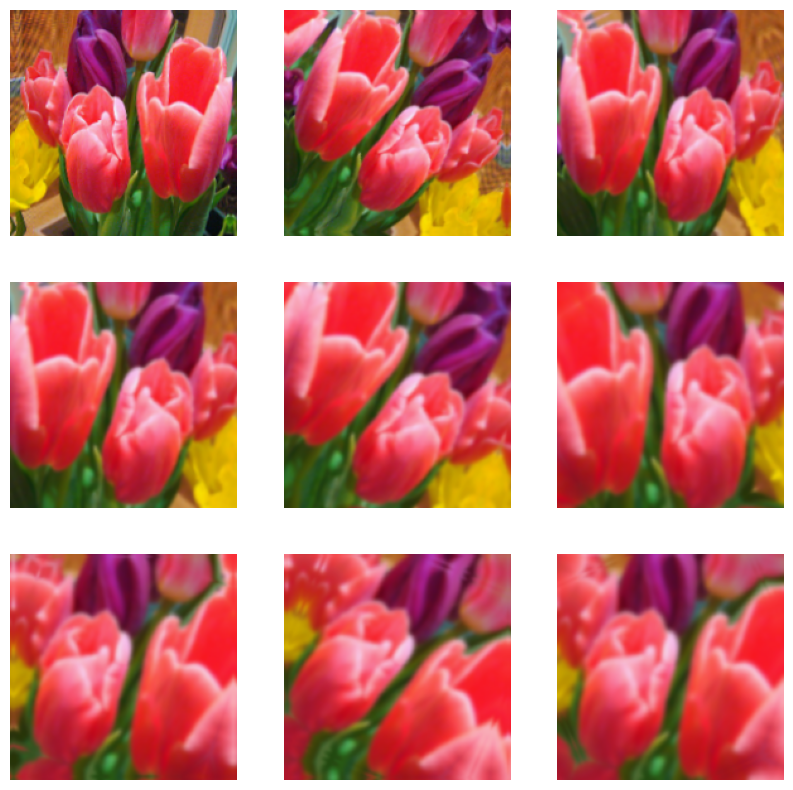

In [40]:
i = 0
plt.figure(figsize=(10,10))
for images, labels in train_ds.take(1):
    for i in range(9):
        images = data_augmentation(images)
        plt.subplot(3,3, i+1)
        plt.imshow(images[3].numpy().astype('uint8'))
        plt.axis('off')

In [41]:
# Define the model
model = Sequential([
    data_augmentation,
    layers.Rescaling(1./255),
    Conv2D(16, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(5)
])

In [42]:
model.build(input_shape=(None, *input_shape))

In [43]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_2 (Sequential)       │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_1 (Rescaling)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 180, 180, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 90, 90, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 90, 90, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 45, 45, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 45, 45, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 30976)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     3,965,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,989,285 (15.22 MB)

 Trainable params: 3,989,285 (15.22 MB)

 Non-trainable params: 0 (0.00 B)

In [44]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [45]:
history = model.fit(train_ds, epochs=15, validation_data=val_ds)

Epoch 1/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 63s 504ms/step - accuracy: 0.3099 - loss: 1.4866 - val_accuracy: 0.4681 - val_loss: 1.2716
Epoch 2/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 50s 460ms/step - accuracy: 0.5339 - loss: 1.1295 - val_accuracy: 0.5933 - val_loss: 1.0260
Epoch 3/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 53s 490ms/step - accuracy: 0.6192 - loss: 0.9530 - val_accuracy: 0.6176 - val_loss: 1.0036
Epoch 4/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 46s 429ms/step - accuracy: 0.6473 - loss: 0.8842 - val_accuracy: 0.6686 - val_loss: 0.8381
Epoch 5/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 55s 510ms/step - accuracy: 0.6766 - loss: 0.8426 - val_accuracy: 0.6848 - val_loss: 0.8238
Epoch 6/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 60s 555ms/step - accuracy: 0.6921 - loss: 0.7841 - val_accuracy: 0.6964 - val_loss: 0.8089
Epoch 7/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 52s 485ms/step - accuracy: 0.7200 - loss: 0.7256 - val_accuracy: 0.7045 - val_loss: 0.8043
Epoch 8/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 45s 421ms/step - accuracy: 0.7263 - loss: 0

In [52]:
def classify_images(image_path):
        input_image = tf.keras.utils.load_img(image_path, target_size=(180,180))
        input_image_array = tf.keras.utils.img_to_array(input_image)
        input_image_exp_dim = tf.expand_dims(input_image_array,0)

        predictions = model.predict(input_image_exp_dim)
        result = tf.nn.softmax(predictions[0])
        outcome = 'The Image belongs to ' + flower_names[np.argmax(result)] + ' with a score of '+ str(np.max(result)*100)
        return outcome


In [53]:
classify_images('Sample/rose1.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


'The Image belongs to rose with a score of 98.47784638404846'

In [54]:
classify_images('Sample/sunflower1.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


'The Image belongs to sunflower with a score of 76.73537731170654'

In [55]:
classify_images('Sample/daisy.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


'The Image belongs to daisy with a score of 99.99537467956543'

In [56]:
classify_images('Sample/sunflower2.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


'The Image belongs to sunflower with a score of 64.68114256858826'

In [57]:
classify_images('Sample/dandalian.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


'The Image belongs to sunflower with a score of 61.85035705566406'

In [66]:
model.save('Flower_recognition.keras')